# BIA 6303 - Homework 1, Notebook 3
# Eric Long

In [19]:
#environmental setup
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#increase lines of output (for troubleshooting)
pd.set_option('display.max_colwidth', 15000)
pd.set_option('display.max_rows', 5000)

## 1. Read ames.csv into a dataframe

In [20]:
#read in auto.csv
path = 'C:/Users/el033195/OneDrive - Cerner Corporation/PERSONAL/Data Science/BIA6303 - Predictive Models/BIA6303PredictiveModels/Module2/data/'
ames = pd.read_csv(path + 'ames.csv')

## 2. Explore the data frame, check for missing values

In [21]:
#dimensions
ames.shape

(2930, 82)

In [22]:
#data types
ames.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [23]:
#output top of dataframe
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [24]:
#remove the "order" column, the values here are not relevant
ames.drop(columns='Order', inplace=True)

In [25]:
#based on above, we can see many NaN values
#continue checking for missing data
missing_cols = ames.isna().sum()
print(missing_cols[missing_cols != 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Observations: 80 predictors after dropping the "Order" column. Lots of NA values, however the categorical ones seem to be by design

## 3. Replace missing values with mean of feature

In [26]:
#replace numeric missing values with the mean of the column
#code taken from https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
ames.fillna(ames.mean(), inplace=True)

In [27]:
#confirm
ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 4. Perform correlation analysis on the numeric attributes

In [28]:
#grab all the numeric features
numeric_cols = ames.select_dtypes(include=['int64', 'float64'])
print(numeric_cols.columns)
print(numeric_cols.shape)

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')
(2930, 38)


In [29]:
#create correlation matrix
#code taken from module 2 "Regularization_Demo"
corr_matrix=numeric_cols.corr()
corr_matrix

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.088419,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.228392,-0.098358,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002724,-0.060067,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.088419,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.203383,0.199946,...,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921,0.340751
Lot Area,0.034868,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126586,0.191546,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.198900,0.097188,1.000000,-0.094812,0.597027,0.569609,0.427470,0.284011,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.067383,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135088,-0.050920,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.115688,0.023258,0.597027,-0.368773,1.000000,0.612095,0.311828,0.279836,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.085744,0.021682,0.569609,0.047680,0.612095,1.000000,0.196170,0.151720,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.228392,0.002724,0.203383,0.126586,0.427470,-0.135088,0.311828,0.196170,1.000000,0.300396,...,0.165108,0.142766,-0.110447,0.013778,0.065622,0.004617,0.044932,-0.000275,-0.017665,0.505784
BsmtFin SF 1,-0.098358,-0.060067,0.199946,0.191546,0.284011,-0.050920,0.279836,0.151720,0.300396,1.000000,...,0.223989,0.124937,-0.100453,0.050541,0.095873,0.084140,0.092886,-0.001155,0.022397,0.432794


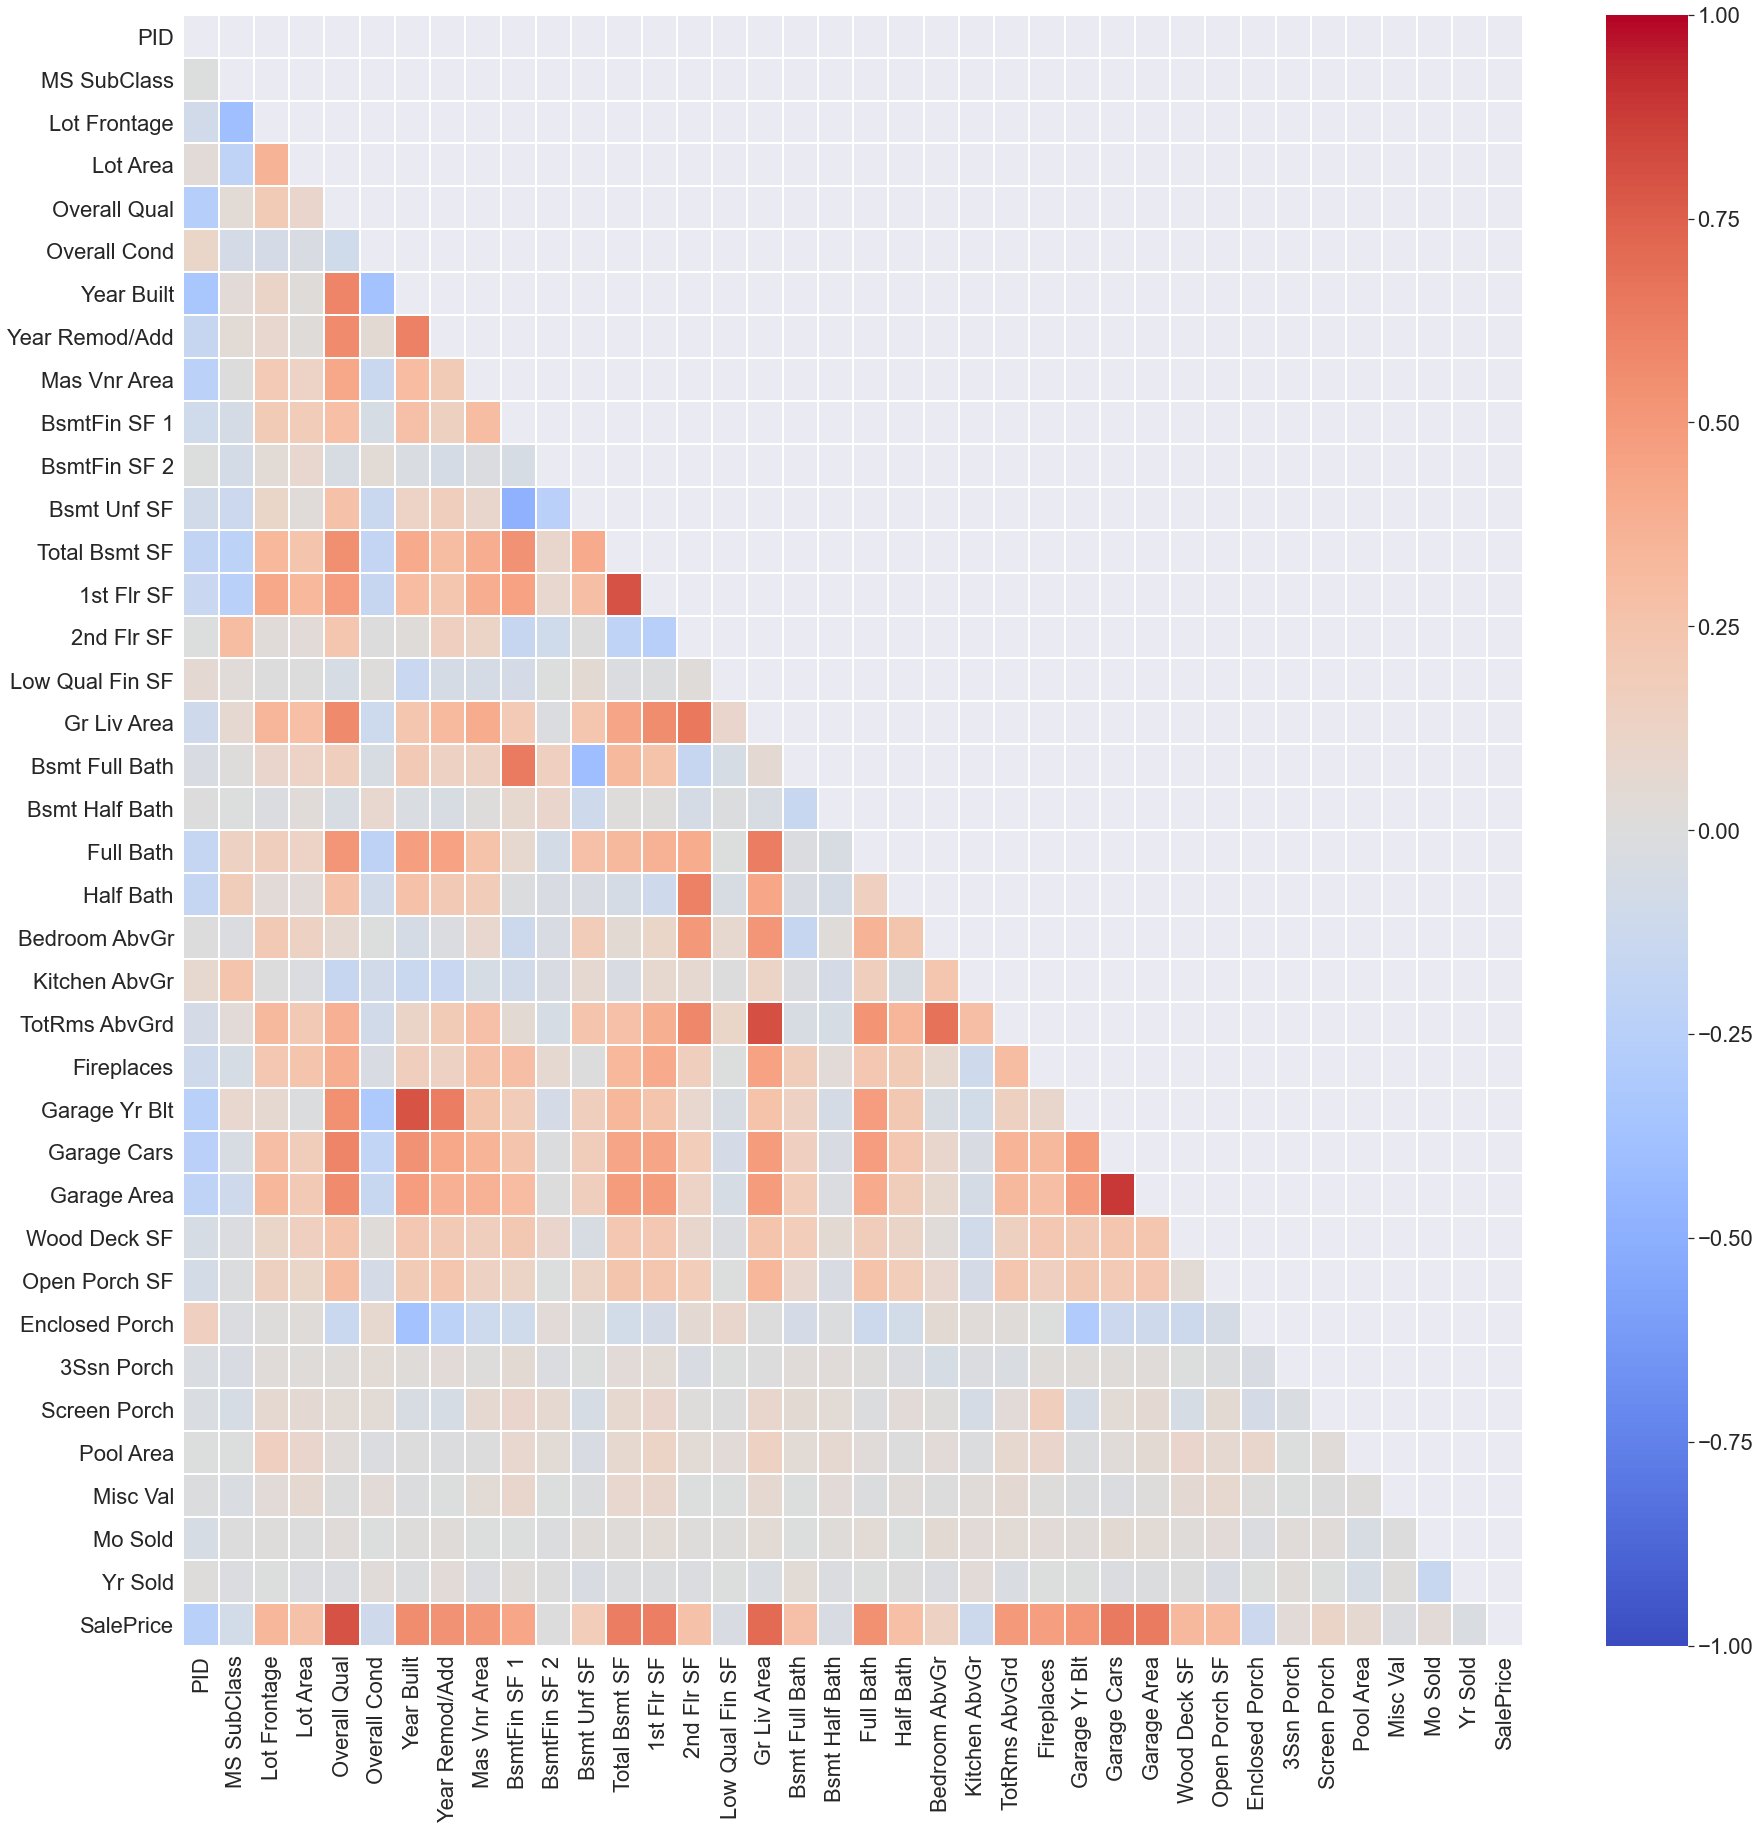

In [30]:
#plot correlation matrix
#code taken from module 2 "Regularization_Demo"
#individual values removed to increase readability
import seaborn as sns
plt.rcParams['figure.figsize'] = [30, 30]
#plt.figure(figsize=(25,25))
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_theme(font_scale=2)

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=False,
           linewidths=1,
           mask=mask)
plt.show()

Observations:

Variables with highest positive correlation: SalePrice/Overall Qual, Garage Yr Blt/Year Built, Gr Liv Area/TotRms AbvGrd, 1st Flr SF/Total Bsmt SF, Garage Area/Garage Cars

Variables with highest negative correlation: Lot Frontage/MS SubClass, Bsmt Unf SF/Bsmt Full Bath, BsmtFin SF 1/Bsmt Unf SF, Year Built/Overall Cond, 

## 5. Convert categorical variables into dummies

In [31]:
#function to transform categorical data into dummies
#will also fill out missing data, if applicable
#code taken from module 1 "scikit_learn_intro"
for col in ames.columns[:-1]:
	attName = col
	dType = ames[col].dtype
	missing = pd.isnull(ames[col]).any()
	uniqueCount = len(ames[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		ames = pd.concat([ames, pd.get_dummies(ames[col], prefix=col, drop_first=True)], axis=1)
		del ames[attName]

In [32]:
#updated shape
ames.shape

(2930, 263)

In [33]:
#output top of updated dataframe
ames.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0


Observations: "drop_first=True" added to remove one of the dummy variables to help with multicollinearity

## 6. Check to make sure all columns are numeric

In [34]:
#grab data types
ames.dtypes.value_counts()

uint8      225
int64       27
float64     11
dtype: int64

Observations: confirmed that all output is int64, float64, or unit8 == numeric data types